<a href="https://colab.research.google.com/github/MitziVite/machine_learning/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Categoric Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Train Accuracy: 0.9023098971505649
Test Accuracy: 0.8934448340976531


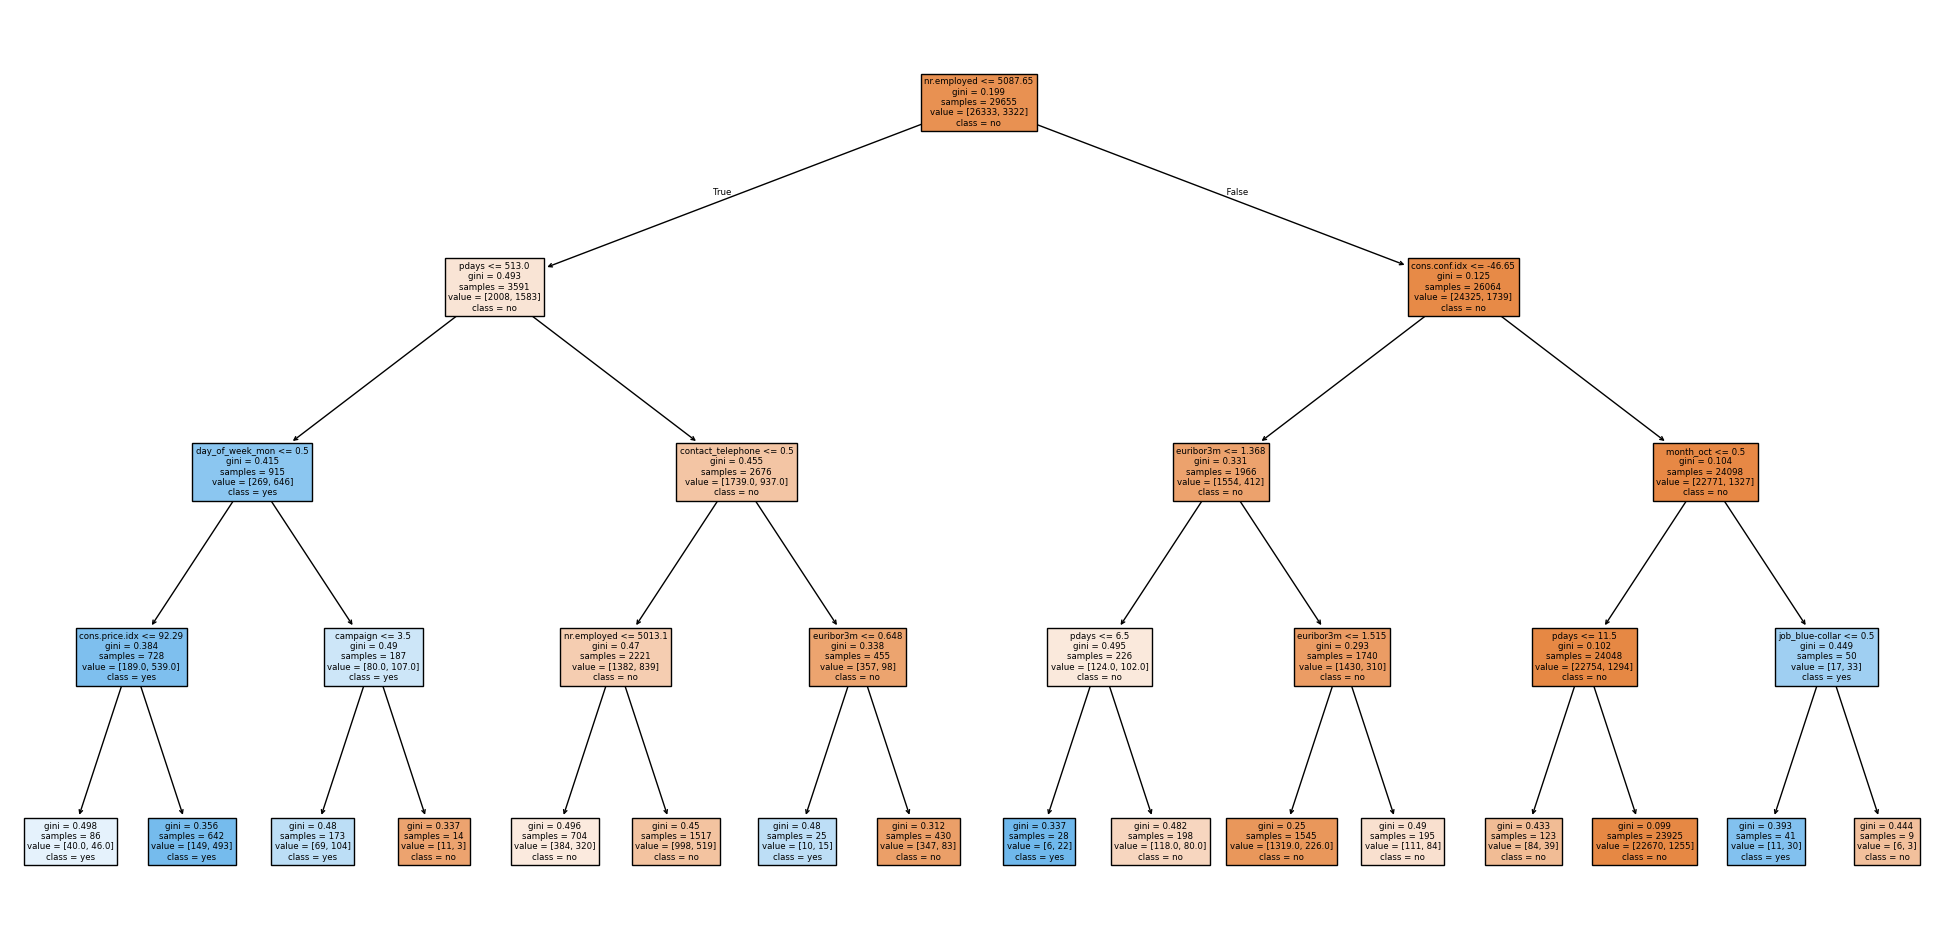

In [7]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

campaign = campaign.dropna()

x = campaign.drop('y', axis=1)
y = campaign['y']

cat_cols = x.select_dtypes(include=['object']).columns.tolist()
print("Categoric Columns:", cat_cols)


encoder = OneHotEncoder(drop='first', sparse_output=False)
x_encoded = pd.DataFrame(encoder.fit_transform(x[cat_cols]))


x_encoded.columns = encoder.get_feature_names_out(cat_cols)


x = x.drop(cat_cols, axis=1).reset_index(drop=True)
x = pd.concat([x, x_encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

plt.figure(figsize=(25,12))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=clf.classes_)
plt.show()
